In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")
#image = url_to_image("http://www.hyperlinkcode.com/images/sample-image.jpg")

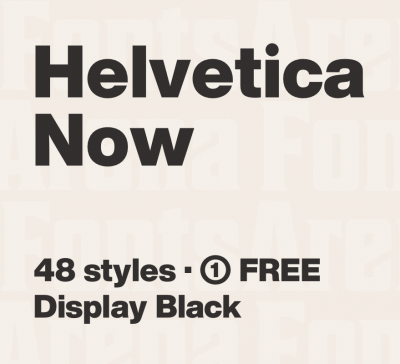

<built-in method count of list object at 0x7f2d55ec6148>
229 236 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 229 237 243 228 236 243 227 235 242 227 235 242 227 235 243 227 235 242 227 235 242 227 235 242 228 235 243 227 235 242 227 235 242 227 236 243 227 235 242 228 235 243 228 236 243 228 236 243 228 236 243 227 235 242 228 236 243 227 235 242 227 235 242 228 236 243 227 235 242 227 235 243 227 235 242 227 235 242 227 235 242 227 236 242 227 235 242 227 235 242 227 235

In [40]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)
lin_img = image.flatten()
pixel_list = lin_img.tolist()
pixel_str_list = map(str, pixel_list)z
img_str = ' '.join(pixel_str_list)
print(img_str)

In [0]:
edges = cv2.Canny(image,100,200)

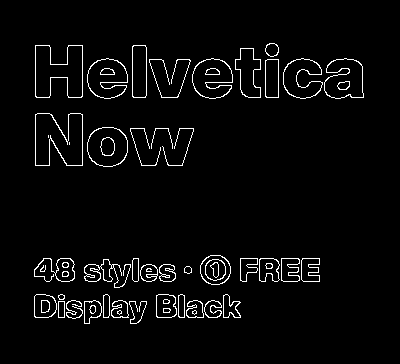

In [16]:
cv2_imshow(edges)

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


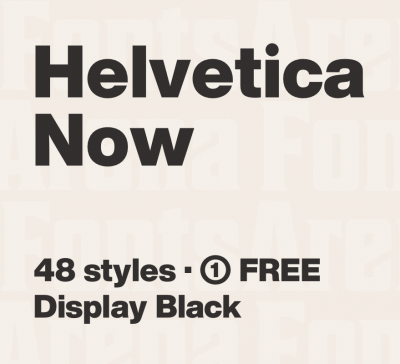

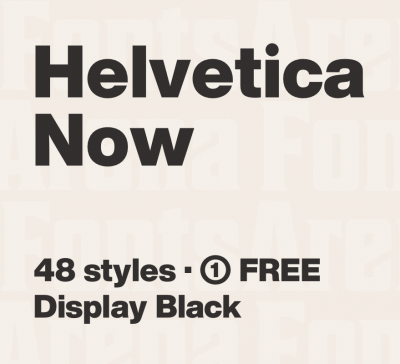

In [23]:
# identity function: retains the original image by just picking the values in the middle
kernel = np.float32([[0,0,0],[0,1,0],[0,0,0]]) # identity function used
print(kernel)
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst) # after feature extraction
print()
cv2_imshow(image) # original image

[[ 2.  2.  2.]
 [-2. -2. -2.]
 [-2. -2. -2.]]


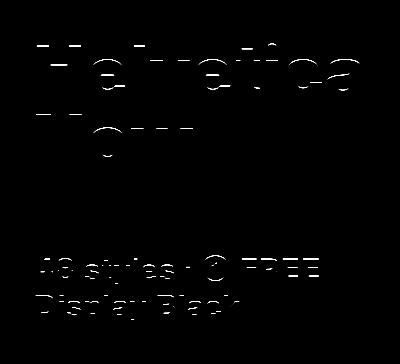

In [18]:
#kernel = np.ones((3,3),np.float32)/25  # Horizontal edge detector function (example 1)
kernel = kernel = np.float32([[2,2,2],[-2,-2,-2],[-2,-2,-2]])
print(kernel)
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)


[[ 1.  2.  1.]
 [-2.  0. -2.]
 [-2. -2.  0.]]


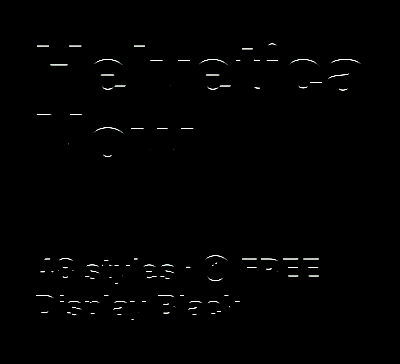

In [19]:
#kernel = np.ones((3,3),np.float32)/25 # Horizontal edge detector example 2 
kernel = np.float32([[1,2,1],[-2,0,-2],[-2,-2,0]])
print(kernel)
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

[[ 2.  1.  0.]
 [ 1.  0. -1.]
 [ 0. -1. -2.]]


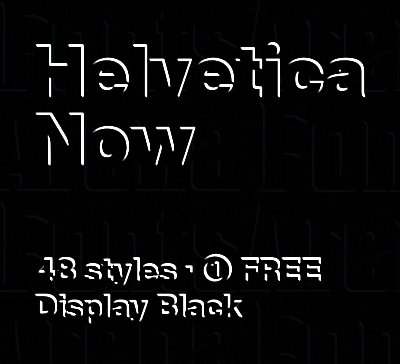

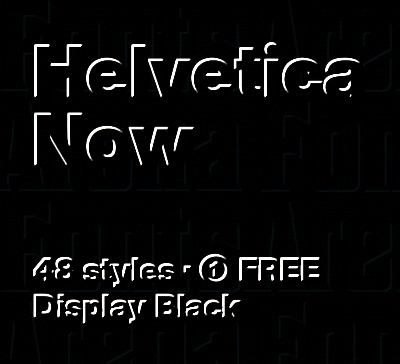

In [49]:
# 45 degree edge detector function:
kernel451 =  np.float32([[0,1,2],[-1,0,1],[-2,-1,0]]) 
kernel452=np.float32([[2,1,0],[1,0,-1],[0,-1,-2]])
print(kernel452)
dst1 = cv2.filter2D(image,-1,kernel451)
dst2 = cv2.filter2D(image,-1,kernel452)
cv2_imshow(dst1)
print()
cv2_imshow(dst2)

#this edge detector kernel tries to find the differences between the neighbouring pixels to detect an edge. Since it is a black and white image, it tries to retain 0 (black values) and tries to convert the edges to white pixels when an edge is detected.

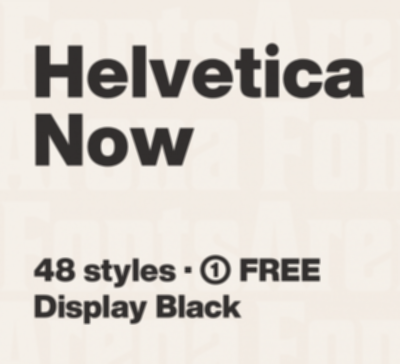

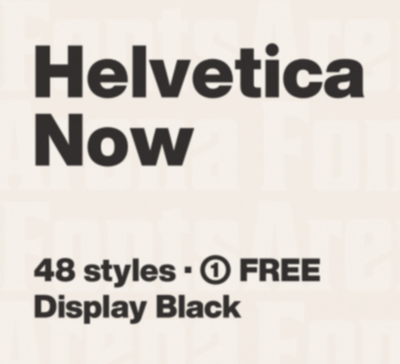

In [52]:
# Bluring a image
kernel1 = np.ones((3,3),np.float32)/9 #(averaging out)
kernel2=np.float32([[0.0625,0.125,0.0625],[0.125,0.25,0.125],[0.0625,0.125,0.0625]])#(giving more weightage to the neighbouring pixel = gaussian blur)
dst1 = cv2.filter2D(image,-1,kernel1)
dst2 = cv2.filter2D(image,-1,kernel2)
cv2_imshow(dst1)
print()
cv2_imshow(dst2)

# Blur kernel tries to used to de-noise. It tries to de-emphasize the differences in the neighboring pixel.

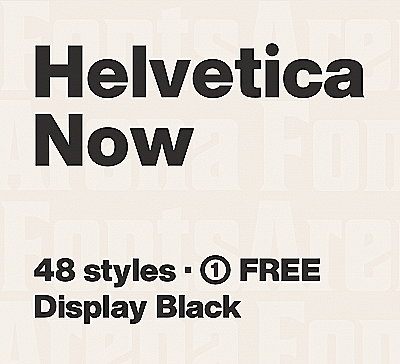

In [53]:
# sharpening an image
kernel=np.float32([[0,-1,0],[-1,5,-1],[0,-1,0]])#(giving more weightage to the center pixel and change between the neighbouring pixels)
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

# Sharpening kernel helps to identify the difference between the neigbouring pixels to identify the edges better